## Problem Statement 

The main aim of our project is to find the price of car by using various features of car,
which we discuss as we go ahead

In [370]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt 
import seaborn as sns 

from sklearn.model_selection import train_test_split,RandomizedSearchCV,GridSearchCV
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings("ignore")

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression

from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [372]:
model_details = []
Testing_accuracy = []
Training_accuracy = []

## Data Gathering 

In [374]:
df = pd.read_csv("autos_dataset.csv")
df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,10,114,5400,23,28,16845
191,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9,160,5300,19,25,19045
192,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,9,134,5500,18,23,21485
193,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23,106,4800,26,27,22470


In [375]:
df.info()       # All Information About Dataset 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          195 non-null    int64  
 1   normalized-losses  195 non-null    object 
 2   make               195 non-null    object 
 3   fuel-type          195 non-null    object 
 4   aspiration         195 non-null    object 
 5   num-of-doors       195 non-null    object 
 6   body-style         195 non-null    object 
 7   drive-wheels       195 non-null    object 
 8   engine-location    195 non-null    object 
 9   wheel-base         195 non-null    float64
 10  length             195 non-null    float64
 11  width              195 non-null    float64
 12  height             195 non-null    float64
 13  curb-weight        195 non-null    int64  
 14  engine-type        195 non-null    object 
 15  num-of-cylinders   195 non-null    object 
 16  engine-size        195 non

In [376]:
df = df.replace({"?":np.nan})     # Replace "?" with np.nan

In [377]:
df.isna().sum()      # Find Null Value Count Columnwise

symboling             0
normalized-losses    35
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  0
stroke                0
compression-ratio     0
horsepower            0
peak-rpm              0
city-mpg              0
highway-mpg           0
price                 0
dtype: int64

### EDA --> Explorary Data Analysys

#### 1. df["symboling"]

In [378]:
df["symboling"]

0      3
1      3
2      1
3      2
4      2
      ..
190   -1
191   -1
192   -1
193   -1
194   -1
Name: symboling, Length: 195, dtype: int64

In [379]:
df["symboling"].value_counts()

 0    64
 1    52
 2    31
 3    23
-1    22
-2     3
Name: symboling, dtype: int64

In [380]:
df["symboling"].isna().sum()

0

In [381]:
df["symboling"].dtype

dtype('int64')

<AxesSubplot:xlabel='symboling'>

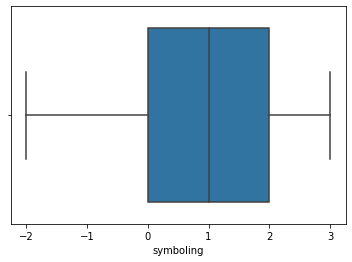

In [382]:
sns.boxplot(df["symboling"])       # By using boxplot We can Find IS there Any Outlier Present 

<AxesSubplot:>

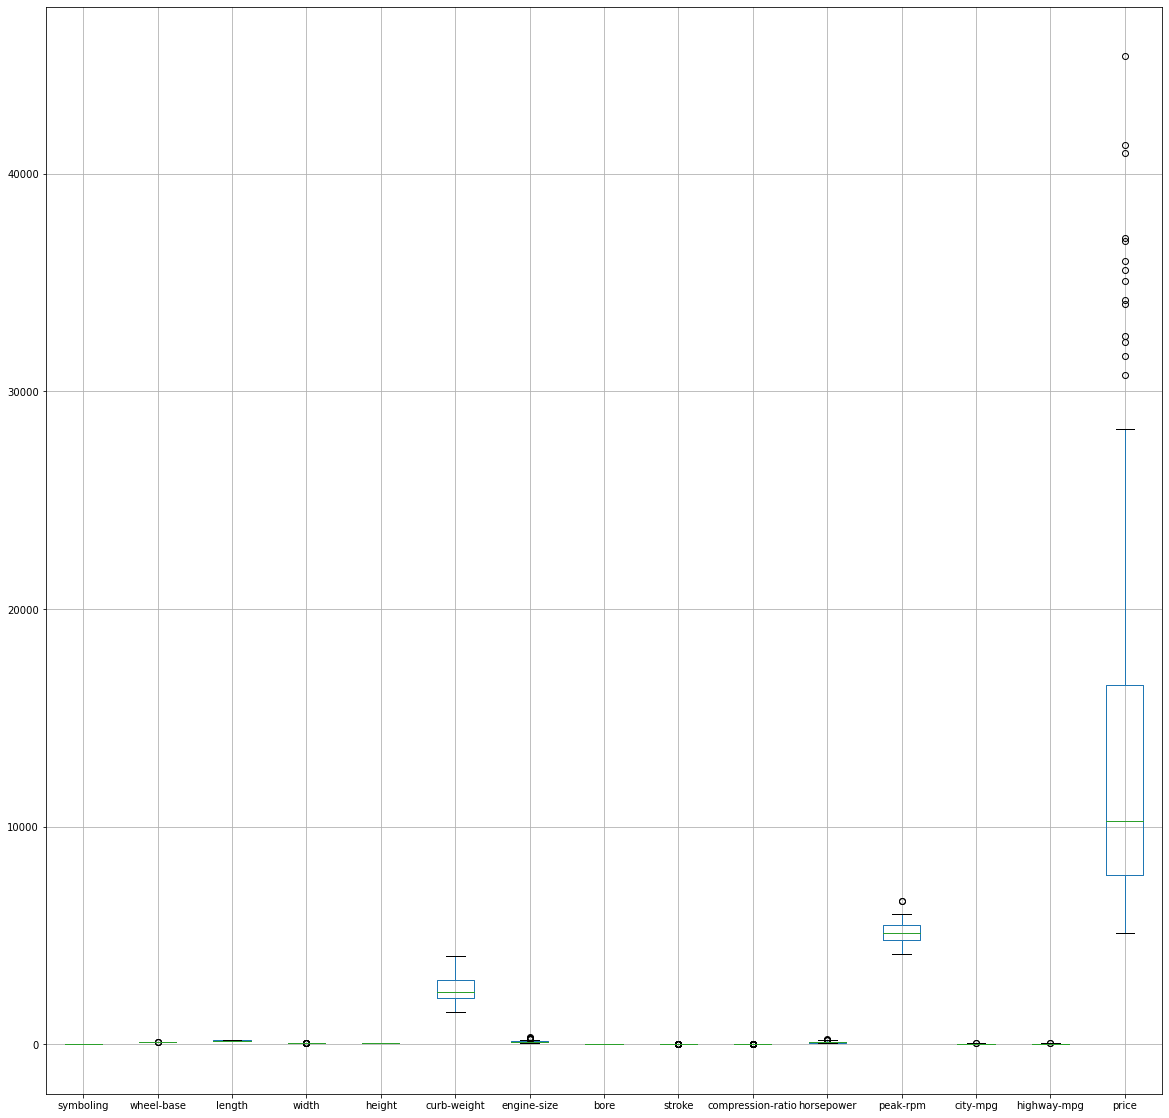

In [383]:
plt.figure(figsize=(20,20))
df.boxplot()

#### 2. df["normalized-losses"]

In [384]:
df["normalized-losses"]

0      NaN
1      NaN
2      NaN
3      164
4      164
      ... 
190     95
191     95
192     95
193     95
194     95
Name: normalized-losses, Length: 195, dtype: object

In [385]:
df["normalized-losses"] = df["normalized-losses"].astype("float")

<AxesSubplot:xlabel='normalized-losses'>

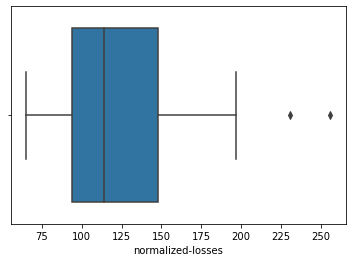

In [386]:
sns.boxplot(df["normalized-losses"])        # Outlier Before null value replace 

In [387]:
q1 = df["normalized-losses"].quantile(0.25)
q2 = df["normalized-losses"].quantile(0.50)
q3 = df["normalized-losses"].quantile(0.75)
median = df["normalized-losses"].median()

iqr = q3 - q1
upper_tail = q3 + 1.5*iqr
lower_tail = q1 - 1.5*iqr
print("Q1 :",q1)
print("Q2 :",q2)
print("Q3 :",q3)
print("Median :",median)
print("upper_tail :",upper_tail)
print("lower_tail :",lower_tail)

Q1 : 94.0
Q2 : 114.0
Q3 : 148.0
Median : 114.0
upper_tail : 229.0
lower_tail : 13.0


In [388]:
median = df["normalized-losses"].loc[df["normalized-losses"] < upper_tail].median()
df["normalized-losses"].loc[df["normalized-losses"] > upper_tail] = median
df["normalized-losses"].loc[df["normalized-losses"] > upper_tail]

Series([], Name: normalized-losses, dtype: float64)

In [389]:
df["normalized-losses"].loc[df["normalized-losses"] > upper_tail]

Series([], Name: normalized-losses, dtype: float64)

In [390]:
df["normalized-losses"].loc[df["normalized-losses"] > upper_tail] = median

In [391]:
df["normalized-losses"] = df["normalized-losses"].fillna(df["normalized-losses"].median())

In [392]:
df["normalized-losses"].isna().sum()

0

<AxesSubplot:xlabel='normalized-losses'>

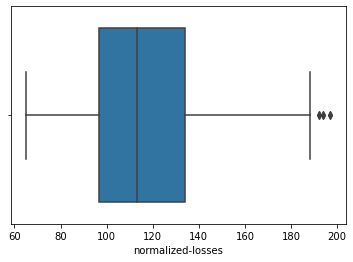

In [393]:
sns.boxplot(df["normalized-losses"])      # Outlier after null value replace 

In [394]:
df["normalized-losses"].dtype

dtype('float64')

In [395]:
df["normalized-losses"].isna().sum()

0

#### 3. df["make"]

In [396]:
df["make"].value_counts()

toyota           32
nissan           18
honda            13
mazda            13
mitsubishi       13
volkswagen       12
subaru           12
volvo            11
peugot           11
dodge             9
bmw               8
mercedes-benz     8
plymouth          7
saab              6
audi              6
porsche           4
alfa-romero       3
jaguar            3
chevrolet         3
isuzu             2
mercury           1
Name: make, dtype: int64

In [397]:
df["make"].isna().sum()

0

In [398]:
df = pd.get_dummies(df ,columns=["make"])
df

,symboling,normalized-losses,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,make_mitsubishi,make_nissan,make_peugot,make_plymouth,make_porsche,make_saab,make_subaru,make_toyota,make_volkswagen,make_volvo
0,3,113.0,gas,std,two,convertible,rwd,front,88.6,168.8,...,0,0,0,0,0,0,0,0,0,0
1,3,113.0,gas,std,two,convertible,rwd,front,88.6,168.8,...,0,0,0,0,0,0,0,0,0,0
2,1,113.0,gas,std,two,hatchback,rwd,front,94.5,171.2,...,0,0,0,0,0,0,0,0,0,0
3,2,164.0,gas,std,four,sedan,fwd,front,99.8,176.6,...,0,0,0,0,0,0,0,0,0,0
4,2,164.0,gas,std,four,sedan,4wd,front,99.4,176.6,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,-1,95.0,gas,std,four,sedan,rwd,front,109.1,188.8,...,0,0,0,0,0,0,0,0,0,1
191,-1,95.0,gas,turbo,four,sedan,rwd,front,109.1,188.8,...,0,0,0,0,0,0,0,0,0,1
192,-1,95.0,gas,std,four,sedan,rwd,front,109.1,188.8,...,0,0,0,0,0,0,0,0,0,1
193,-1,95.0,diesel,turbo,four,sedan,rwd,front,109.1,188.8,...,0,0,0,0,0,0,0,0,0,1


#### 4. df["fuel-type"]

In [399]:
df["fuel-type"].isna().sum()

0

In [400]:
df["fuel-type"].value_counts().to_dict()

{'gas': 175, 'diesel': 20}

In [401]:
df["fuel-type"] = df["fuel-type"].replace({'gas': 0, 'diesel': 1})

In [402]:
df["fuel-type"].dtype

dtype('int64')

In [403]:
fuel_type_dict = {'gas': 0, 'diesel': 1}
fuel_type_dict

{'gas': 0, 'diesel': 1}

<AxesSubplot:>

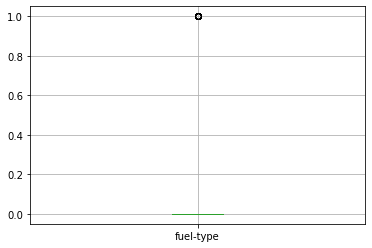

In [404]:
df[["fuel-type"]].boxplot()

<AxesSubplot:xlabel='fuel-type'>

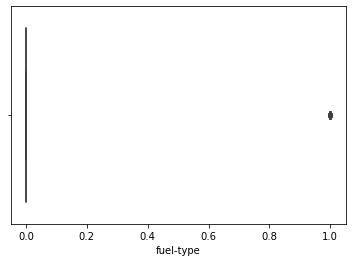

In [405]:
sns.boxplot(df["fuel-type"])

In [406]:
q1 = df["fuel-type"].quantile(0.25)
q2 = df["fuel-type"].quantile(0.50)
q3 = df["fuel-type"].quantile(0.75)
median = df["fuel-type"].median()

iqr = q3 - q1
upper_tail = q3 + 1.5*iqr
lower_tail = q1 - 1.5*iqr
print("Q1 :",q1)
print("Q2 :",q2)
print("Q3 :",q3)
print("Median :",median)
print("upper_tail :",upper_tail)
print("lower_tail :",lower_tail)

Q1 : 0.0
Q2 : 0.0
Q3 : 0.0
Median : 0.0
upper_tail : 0.0
lower_tail : 0.0


#### df["aspiration"]

In [407]:
df["aspiration"].isna().sum()

0

In [408]:
df["aspiration"].value_counts().to_dict()

{'std': 159, 'turbo': 36}

In [409]:
df["aspiration"] = df["aspiration"].replace({'std': 0, 'turbo': 1})
df["aspiration"].dtype

dtype('int64')

In [410]:
aspiration_dict = {'std': 0, 'turbo': 1}
aspiration_dict

{'std': 0, 'turbo': 1}

#### 5. df["num-of-doors"]

In [411]:
df["num-of-doors"].isna().sum()

2

In [412]:
df["num-of-doors"].value_counts()

four    112
two      81
Name: num-of-doors, dtype: int64

In [413]:
df["num-of-doors"] = df["num-of-doors"].fillna(df["num-of-doors"].mode()[0])

In [414]:
df["num-of-doors"].isna().sum()

0

In [415]:
df["num-of-doors"].value_counts().to_dict()

{'four': 114, 'two': 81}

In [416]:
df["num-of-doors"].replace({'four': 0, 'two': 1},inplace=True)

In [417]:
df["num-of-doors"]

0      1
1      1
2      1
3      0
4      0
      ..
190    0
191    0
192    0
193    0
194    0
Name: num-of-doors, Length: 195, dtype: int64

In [418]:
num_of_doors_dict = {'four': 0, 'two': 1}
num_of_doors_dict

{'four': 0, 'two': 1}

<AxesSubplot:xlabel='num-of-doors'>

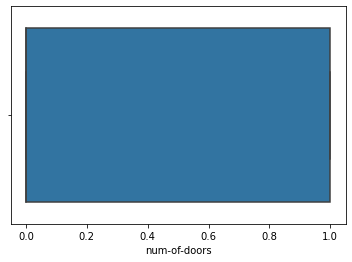

In [419]:
sns.boxplot(df["num-of-doors"])

#### 6.df["body-style"]

In [420]:
df["body-style"].isna().sum()

0

In [421]:
df["body-style"].value_counts()

sedan          94
hatchback      63
wagon          24
hardtop         8
convertible     6
Name: body-style, dtype: int64

In [422]:
df = pd.get_dummies(df,columns=["body-style"])

#### 7. df["drive-wheels"]

In [423]:
df["drive-wheels"].isna().sum()

0

In [424]:
df["drive-wheels"].value_counts()

fwd    116
rwd     71
4wd      8
Name: drive-wheels, dtype: int64

In [425]:
df["drive-wheels"].value_counts().to_dict()

{'fwd': 116, 'rwd': 71, '4wd': 8}

In [426]:
df["drive-wheels"].replace({'fwd': 0, 'rwd': 1, '4wd': 2},inplace=True)

In [427]:
df["drive-wheels"]

0      1
1      1
2      1
3      0
4      2
      ..
190    1
191    1
192    1
193    1
194    1
Name: drive-wheels, Length: 195, dtype: int64

In [428]:
drive_wheel_dict = {'fwd': 0, 'rwd': 1, '4wd': 2}
drive_wheel_dict

{'fwd': 0, 'rwd': 1, '4wd': 2}

#### 8. df["engine-location"]

In [429]:
df["engine-location"].isna().sum()

0

In [430]:
df["engine-location"].value_counts()

front    192
rear       3
Name: engine-location, dtype: int64

In [431]:
df["engine-location"].value_counts().to_dict()

{'front': 192, 'rear': 3}

In [432]:
df["engine-location"].replace({'front': 0, 'rear': 1},inplace=True)

In [433]:
engine_location_dict = {'front': 0, 'rear': 1}
engine_location_dict

{'front': 0, 'rear': 1}

#### 9. df["engine-type"]

In [434]:
df["engine-type"].isna().sum()

0

In [435]:
df["engine-type"].value_counts()

ohc     143
ohcf     15
ohcv     13
dohc     12
l        12
Name: engine-type, dtype: int64

In [436]:
df = pd.get_dummies(df,columns=["engine-type"])

In [437]:
df

,symboling,normalized-losses,fuel-type,aspiration,num-of-doors,drive-wheels,engine-location,wheel-base,length,width,...,body-style_convertible,body-style_hardtop,body-style_hatchback,body-style_sedan,body-style_wagon,engine-type_dohc,engine-type_l,engine-type_ohc,engine-type_ohcf,engine-type_ohcv
0,3,113.0,0,0,1,1,0,88.6,168.8,64.1,...,1,0,0,0,0,1,0,0,0,0
1,3,113.0,0,0,1,1,0,88.6,168.8,64.1,...,1,0,0,0,0,1,0,0,0,0
2,1,113.0,0,0,1,1,0,94.5,171.2,65.5,...,0,0,1,0,0,0,0,0,0,1
3,2,164.0,0,0,0,0,0,99.8,176.6,66.2,...,0,0,0,1,0,0,0,1,0,0
4,2,164.0,0,0,0,2,0,99.4,176.6,66.4,...,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,-1,95.0,0,0,0,1,0,109.1,188.8,68.9,...,0,0,0,1,0,0,0,1,0,0
191,-1,95.0,0,1,0,1,0,109.1,188.8,68.8,...,0,0,0,1,0,0,0,1,0,0
192,-1,95.0,0,0,0,1,0,109.1,188.8,68.9,...,0,0,0,1,0,0,0,0,0,1
193,-1,95.0,1,1,0,1,0,109.1,188.8,68.9,...,0,0,0,1,0,0,0,1,0,0


#### 10. df["num-of-cylinders"]

In [438]:
df["num-of-cylinders"].isna().sum()

0

In [439]:
df["num-of-cylinders"].value_counts()

four      155
six        24
five       10
eight       4
three       1
twelve      1
Name: num-of-cylinders, dtype: int64

In [440]:
df["num-of-cylinders"].value_counts().to_dict()

{'four': 155, 'six': 24, 'five': 10, 'eight': 4, 'three': 1, 'twelve': 1}

In [441]:
df["num-of-cylinders"].replace({'four': 4,
 'six': 6,
 'five': 5,
 'eight': 8,
 'two': 2,
 'three': 3,
 'twelve': 12}
,inplace=True)

In [442]:
num_of_cylinder_dict = {'four': 4,
 'six': 6,
 'five': 5,
 'eight': 8,
 'two': 2,
 'three': 3,
 'twelve': 12}
num_of_cylinder_dict

{'four': 4,
 'six': 6,
 'five': 5,
 'eight': 8,
 'two': 2,
 'three': 3,
 'twelve': 12}

#### 11. df["fuel-system"]

In [443]:
df["fuel-system"].isna().sum()

0

In [444]:
df["fuel-system"].value_counts()

mpfi    89
2bbl    64
idi     20
1bbl    11
spdi     9
mfi      1
spfi     1
Name: fuel-system, dtype: int64

In [445]:
df = pd.get_dummies(df, columns=["fuel-system"])
df

,symboling,normalized-losses,fuel-type,aspiration,num-of-doors,drive-wheels,engine-location,wheel-base,length,width,...,engine-type_ohc,engine-type_ohcf,engine-type_ohcv,fuel-system_1bbl,fuel-system_2bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi
0,3,113.0,0,0,1,1,0,88.6,168.8,64.1,...,0,0,0,0,0,0,0,1,0,0
1,3,113.0,0,0,1,1,0,88.6,168.8,64.1,...,0,0,0,0,0,0,0,1,0,0
2,1,113.0,0,0,1,1,0,94.5,171.2,65.5,...,0,0,1,0,0,0,0,1,0,0
3,2,164.0,0,0,0,0,0,99.8,176.6,66.2,...,1,0,0,0,0,0,0,1,0,0
4,2,164.0,0,0,0,2,0,99.4,176.6,66.4,...,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,-1,95.0,0,0,0,1,0,109.1,188.8,68.9,...,1,0,0,0,0,0,0,1,0,0
191,-1,95.0,0,1,0,1,0,109.1,188.8,68.8,...,1,0,0,0,0,0,0,1,0,0
192,-1,95.0,0,0,0,1,0,109.1,188.8,68.9,...,0,0,1,0,0,0,0,1,0,0
193,-1,95.0,1,1,0,1,0,109.1,188.8,68.9,...,1,0,0,0,0,1,0,0,0,0


#### 12. df["bore"]

In [446]:
df["bore"].isna().sum()

0

In [447]:
df["bore"] = df["bore"].fillna(df["bore"].median())

In [448]:
df["bore"].isna().sum()

0

In [449]:
df["bore"] = df["bore"].astype("float")

#### 13. df["stroke"]

In [450]:
df["stroke"].isna().sum()

0

In [451]:
df["stroke"] = df["stroke"].fillna(df["stroke"].median())

In [452]:
df["stroke"].isna().sum()

0

In [453]:
df["stroke"] = df["stroke"].astype("float")

#### 14. df["horsepower"]

In [454]:
df["horsepower"].isna().sum()

0

In [455]:
df["horsepower"] = df["horsepower"].fillna(df["horsepower"].median())

In [456]:
df["horsepower"].isna().sum()

0

In [457]:
df["horsepower"] = df["horsepower"].astype("float")

#### 15. df["peak-rpm"]

In [458]:
df["peak-rpm"].isna().sum()

0

In [459]:
df["peak-rpm"] = df["peak-rpm"].fillna(df["peak-rpm"].median())

In [460]:
df["peak-rpm"].isna().sum()

0

In [461]:
df["peak-rpm"] = df["peak-rpm"].astype("float")

#### 16. df["price"]

In [462]:
df["price"].isna().sum()

0

In [463]:
df["price"] = df["price"].fillna(df["price"].median())

In [464]:
df["price"].isna().sum()

0

In [465]:
df["price"] = df["price"].astype("float")

In [466]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 60 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   symboling               195 non-null    int64  
 1   normalized-losses       195 non-null    float64
 2   fuel-type               195 non-null    int64  
 3   aspiration              195 non-null    int64  
 4   num-of-doors            195 non-null    int64  
 5   drive-wheels            195 non-null    int64  
 6   engine-location         195 non-null    int64  
 7   wheel-base              195 non-null    float64
 8   length                  195 non-null    float64
 9   width                   195 non-null    float64
 10  height                  195 non-null    float64
 11  curb-weight             195 non-null    int64  
 12  num-of-cylinders        195 non-null    int64  
 13  engine-size             195 non-null    int64  
 14  bore                    195 non-null    fl

In [467]:
a = df.corr()
b = a.iloc[:,21].head(60)
b

symboling                -0.084118
normalized-losses         0.087546
fuel-type                 0.108968
aspiration                0.178047
num-of-doors             -0.042355
drive-wheels              0.490574
engine-location           0.331025
wheel-base                0.585793
length                    0.695331
width                     0.754273
height                    0.138291
curb-weight               0.835729
num-of-cylinders          0.746406
engine-size               0.888942
bore                      0.546873
stroke                    0.093746
compression-ratio         0.079690
horsepower                0.811027
peak-rpm                 -0.104333
city-mpg                 -0.702685
highway-mpg              -0.715590
price                     1.000000
make_alfa-romero          0.035005
make_audi                 0.102243
make_bmw                  0.331289
make_chevrolet           -0.112639
make_dodge               -0.147071
make_honda               -0.168403
make_isuzu          

<AxesSubplot:>

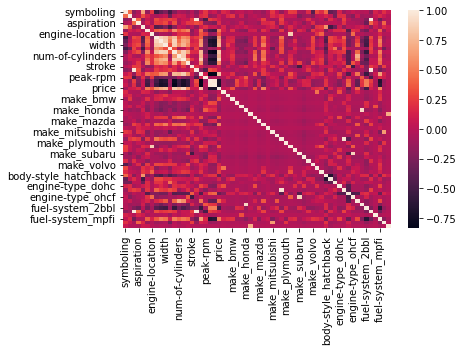

In [468]:
sns.heatmap(df.corr())

column name---> symboling
q1 0.0
q2 1.0
q3 2.0
IQR 2.0
llp -3.0
ulp 5.0
mean: 0.7948717948717948
median: 1.0
mode 0
skewness: 0.21372702057061665
std 1.2306122686060246
max 3
min -2
null_value count: 0


column name---> normalized-losses
q1 96.5
q2 113.0
q3 134.0
IQR 37.5
llp 40.25
ulp 190.25
mean: 118.47179487179487
median: 113.0
mode 113.0
skewness: 0.6899017597244649
std 29.805952743148094
max 197.0
min 65.0
null_value count: 0


column name---> fuel-type
q1 0.0
q2 0.0
q3 0.0
IQR 0.0
llp 0.0
ulp 0.0
mean: 0.10256410256410256
median: 0.0
mode 0
skewness: 2.6403319901303983
std 0.30416963142975534
max 1
min 0
null_value count: 0


column name---> aspiration
q1 0.0
q2 0.0
q3 0.0
IQR 0.0
llp 0.0
ulp 0.0
mean: 0.18461538461538463
median: 0.0
mode 0
skewness: 1.63838574447444
std 0.3889839139721636
max 1
min 0
null_value count: 0


column name---> num-of-doors
q1 0.0
q2 0.0
q3 1.0
IQR 1.0
llp -1.5
ulp 2.5
mean: 0.4153846153846154
median: 0.0
mode 0
skewness: 0.3460826809603059
std 0.49405

q3 0.0
IQR 0.0
llp 0.0
ulp 0.0
mean: 0.03076923076923077
median: 0.0
mode 0
skewness: 5.47652940792316
std 0.17313638946695362
max 1
min 0
null_value count: 0


column name---> make_subaru
q1 0.0
q2 0.0
q3 0.0
IQR 0.0
llp 0.0
ulp 0.0
mean: 0.06153846153846154
median: 0.0
mode 0
skewness: 3.6773994276458204
std 0.2409339480594585
max 1
min 0
null_value count: 0


column name---> make_toyota
q1 0.0
q2 0.0
q3 0.0
IQR 0.0
llp 0.0
ulp 0.0
mean: 0.1641025641025641
median: 0.0
mode 0
skewness: 1.8279460168030823
std 0.3713219484845747
max 1
min 0
null_value count: 0


column name---> make_volkswagen
q1 0.0
q2 0.0
q3 0.0
IQR 0.0
llp 0.0
ulp 0.0
mean: 0.06153846153846154
median: 0.0
mode 0
skewness: 3.6773994276458195
std 0.2409339480594585
max 1
min 0
null_value count: 0


column name---> make_volvo
q1 0.0
q2 0.0
q3 0.0
IQR 0.0
llp 0.0
ulp 0.0
mean: 0.05641025641025641
median: 0.0
mode 0
skewness: 3.8752677190378555
std 0.23130609856739617
max 1
min 0
null_value count: 0


column name---> body

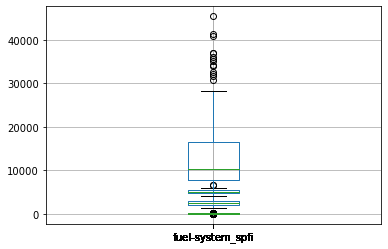

In [469]:
for column in df.columns:
    if df[column].dtype != object:
        q1 = df[column].quantile(0.25)
        q2 = df[column].quantile(0.50)
        q3 = df[column].quantile(0.75)
        
        IQR = q3 - q1
        ul = q3 + 1.5 * IQR
        ll = q1 - 1.5 * IQR
        df[[column]].boxplot()
        print('column name--->',column)
        print('q1',q1)
        print('q2',q2)
        print('q3',q3)
        print('IQR',IQR)
        print('llp',ll)
        print('ulp',ul)
        print('mean:',df[column].mean())
        print('median:',df[column].median())
        print('mode',df[column].mode()[0])
        print('skewness:',df[column].skew())
     
        print('std',df[column].std())
        print('max',df[column].max())
        print('min',df[column].min())
        print('null_value count:',df[column].isnull().sum())
        print('\n')

In [470]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 60 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   symboling               195 non-null    int64  
 1   normalized-losses       195 non-null    float64
 2   fuel-type               195 non-null    int64  
 3   aspiration              195 non-null    int64  
 4   num-of-doors            195 non-null    int64  
 5   drive-wheels            195 non-null    int64  
 6   engine-location         195 non-null    int64  
 7   wheel-base              195 non-null    float64
 8   length                  195 non-null    float64
 9   width                   195 non-null    float64
 10  height                  195 non-null    float64
 11  curb-weight             195 non-null    int64  
 12  num-of-cylinders        195 non-null    int64  
 13  engine-size             195 non-null    int64  
 14  bore                    195 non-null    fl

## Model Training

#### Spliting Data 

In [471]:
x = df.drop("price",axis=1)
y = df["price"]

In [472]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=100)

#### Training Data 

# Train model without hyperparaeter

In [473]:
def train_model(x_train, y_train):
    
    tree = DecisionTreeRegressor(random_state=0)
    tree.fit(x_train,y_train)
    y_pred_tree = tree.predict(x_test)
    model_details.append("Decision Tree without hyperparameter")
    
    rf = RandomForestRegressor(random_state=0)
    rf.fit(x_train,y_train)
    y_pred_rf = rf.predict(x_test)
    model_details.append("Random Forest without Hyperparameter")
    
    knn = KNeighborsRegressor()
    knn.fit(x_train,y_train)
    y_pred_knn = knn.predict(x_test)
    model_details.append("KNN without Hyperparaeter")
    
    lr = LinearRegression()
    lr.fit(x_train,y_train)
    y_pred_lr = lr.predict(x_test)
    model_details.append("Linear Regression without Hyperparameter")
    
    ad = AdaBoostRegressor()
    ad.fit(x_train,y_train)
    y_pred_ad = ad.predict(x_test)
    model_details.append("Adaboost without Hyperparameter")

    
    # testing accuracy of DT 
    MSE_tree = mean_squared_error(y_test,y_pred_tree)
    MAE_tree = mean_squared_error(y_test,y_pred_tree)
    RMSE_tree = np.sqrt(MSE_tree)
    R2_score_tree_test = r2_score(y_test,y_pred_tree)
    Testing_accuracy.append(R2_score_tree_test)
    
    # traing accuracy of DT 
    y_pred_train = tree.predict(x_train)
    MSE_tree = mean_squared_error(y_train,y_pred_train)
    MAE_tree = mean_squared_error(y_train,y_pred_train)
    RMSE_tree = np.sqrt(MSE_tree)
    R2_score_tree_train = r2_score(y_train,y_pred_train)
    Training_accuracy.append(R2_score_tree_train)
    
    # testing accuracy of RF
    MSE_rf = mean_squared_error(y_test,y_pred_rf)
    MAE_rf = mean_squared_error(y_test,y_pred_rf)
    RMSE_rf = np.sqrt(MSE_rf)
    R2_score_rf_test = r2_score(y_test,y_pred_rf)
    Testing_accuracy.append(R2_score_rf_test)
    
    # traing accuracy of RF
    y_pred_train = rf.predict(x_train)
    MSE_rf = mean_squared_error(y_train,y_pred_train)
    MAE_rf = mean_squared_error(y_train,y_pred_train)
    RMSE_rf = np.sqrt(MSE_rf)
    R2_score_rf_train = r2_score(y_train,y_pred_train)
    Training_accuracy.append(R2_score_rf_train)
    
    # testing accuracy of KNN
    MSE_knn = mean_squared_error(y_test,y_pred_knn)
    MAE_knn = mean_squared_error(y_test,y_pred_knn)
    RMSE_knn = np.sqrt(MSE_knn)
    R2_score_knn_test = r2_score(y_test,y_pred_knn)
    Testing_accuracy.append(R2_score_knn_test)
    
    # training accuracy of KNN
    y_pred_train = knn.predict(x_train)
    MSE_knn = mean_squared_error(y_train,y_pred_train)
    MAE_knn = mean_squared_error(y_train,y_pred_train)
    RMSE_knn = np.sqrt(MSE_knn)
    R2_score_knn_train = r2_score(y_train,y_pred_train)
    Training_accuracy.append(R2_score_knn_train)
    
    # testing accuracy of LR
    MSE_lr = mean_squared_error(y_test,y_pred_lr)
    MAE_lr = mean_squared_error(y_test,y_pred_lr)
    RMSE_lr = np.sqrt(MSE_lr)
    R2_score_lr_test = r2_score(y_test,y_pred_lr)
    Testing_accuracy.append(R2_score_lr_test)
    
    # training accuracy of LR
    y_pred_train = lr.predict(x_train)
    MSE_lr = mean_squared_error(y_train,y_pred_train)
    MAE_lr = mean_squared_error(y_train,y_pred_train)
    RMSE_lr = np.sqrt(MSE_lr)
    R2_score_lr_train = r2_score(y_train,y_pred_train)
    Training_accuracy.append(R2_score_lr_train)
    
        # testing accuracy of AD
    MSE_ad = mean_squared_error(y_test,y_pred_ad)
    MAE_ad = mean_squared_error(y_test,y_pred_ad)
    RMSE_ad = np.sqrt(MSE_ad)
    R2_score_ad_test = r2_score(y_test,y_pred_ad)
    Testing_accuracy.append(R2_score_ad_test)
    
    # traing accuracy of AD 
    y_pred_train = ad.predict(x_train)
    MSE_ad = mean_squared_error(y_train,y_pred_train)
    MAE_ad = mean_squared_error(y_train,y_pred_train)
    RMSE_ad = np.sqrt(MSE_ad)
    R2_score_ad_train = r2_score(y_train,y_pred_train)
    Training_accuracy.append(R2_score_ad_train)
    
    print('[1]Decision Tree Testing Accurancy: ', R2_score_tree_test)
    
    print('Mean Absolute Error:', MAE_tree)
    print('Mean Square Error:', MSE_tree)
    print('Root Mean Square Error:', RMSE_tree)
    print('\t')
    
    print('[1]Decision Tree training Accurancy: ', R2_score_tree_train)
    print("\n")

    
    print('[2]RandomForestRegressor Testing Accurancy: ',R2_score_rf_test)
    print('Mean Absolute Error:', MAE_rf)
    print('Mean Square Error:', MSE_rf)
    print('Root Mean Square Error:', RMSE_rf)
    print('\t')    
    
    print('[2]RandomForestRegressor Training Accurancy: ',R2_score_rf_train)
    print("\n")
    
    print('[3]knn Testing Accurancy: ', R2_score_knn_test)
    print('Mean Absolute Error:', MAE_knn)
    print('Mean Square Error:', MSE_knn)
    print('Root Mean Square Error:', RMSE_knn)
    print('\t')
    print('[3]knn Training Accurancy: ', R2_score_knn_train)
    print("\n")
    
    print('[4]Lr Testing Accurancy: ', R2_score_lr_test)
    print('Mean Absolute Error:', MAE_lr)
    print('Mean Square Error:', MSE_lr)
    print('Root Mean Square Error:', RMSE_lr)
    print('\t')
    print('[4]Lr Training Accurancy: ', R2_score_lr_train)
    
    print('[5]Ad Testing Accurancy: ', R2_score_ad_test)
    print('Mean Absolute Error:', MAE_ad)
    print('Mean Square Error:', MSE_ad)
    print('Root Mean Square Error:', RMSE_ad)
    print('\t')
    print('[5]Ad Training Accurancy: ', R2_score_ad_train)
    
train_model(x_train,y_train)

[1]Decision Tree Testing Accurancy:  0.9085408866344316
Mean Absolute Error: 62014.14743589744
Mean Square Error: 62014.14743589744
Root Mean Square Error: 249.0263990742697
	
[1]Decision Tree training Accurancy:  0.9990301687966421


[2]RandomForestRegressor Testing Accurancy:  0.9184429245518163
Mean Absolute Error: 698288.913080054
Mean Square Error: 698288.913080054
Root Mean Square Error: 835.6368308542019
	
[2]RandomForestRegressor Training Accurancy:  0.9890795503144835


[3]knn Testing Accurancy:  0.8020701608704791
Mean Absolute Error: 7931108.255384615
Mean Square Error: 7931108.255384615
Root Mean Square Error: 2816.2223377042897
	
[3]knn Training Accurancy:  0.8759664273183391


[4]Lr Testing Accurancy:  0.8823925719593633
Mean Absolute Error: 1571116.690303277
Mean Square Error: 1571116.690303277
Root Mean Square Error: 1253.4419373482272
	
[4]Lr Training Accurancy:  0.9754295099848374
[5]Ad Testing Accurancy:  0.9159212389766326
Mean Absolute Error: 2263153.5593782035
Mea

# Train model with Hyperparameter of Decision Tree

In [474]:
def dt_model_hyp(x_train, y_train):
    
    dt_model = DecisionTreeRegressor(random_state=0)
    
    hyperparameter = {"criterion":['absolute_error', 'squared_error'],
                     "max_depth":np.arange(3,10),
                     "min_samples_split":np.arange(2,20),
                     "min_samples_leaf":np.arange(2,15)}
    
    gscv_dt = GridSearchCV(dt_model, hyperparameter, cv=5)
    gscv_dt.fit(x_train,y_train)
    dt_model_hy = gscv_dt.best_estimator_
    
    # Testing Accuracy
    dt_model_hy.fit(x_train, y_train)
    y_pred_tree = dt_model_hy.predict(x_test)
    model_details.append("Decision Tree with Hyperparameter")
    
    
    MSE_tree = mean_squared_error(y_test,y_pred_tree)
    MAE_tree = mean_squared_error(y_test,y_pred_tree)
    RMSE_tree = np.sqrt(MSE_tree)
    R2_score_tree_test = r2_score(y_test,y_pred_tree)
    Testing_accuracy.append(R2_score_tree_test)
    
    # Training accuracy
    dt_model_hy.fit(x_train, y_train)
    y_pred_tree_train = dt_model_hy.predict(x_train)
#     model_details.append("Decision Tree with Hyperparameter")
    
    R2_score_tree_train = r2_score(y_train,y_pred_tree_train)
    Training_accuracy.append(R2_score_tree_train)
    
        
    print('[1]Decision Tree Testing Accurancy: ', R2_score_tree_test)
    print('Mean Absolute Error:', MAE_tree)
    print('Mean Square Error:', MSE_tree)
    print('Root Mean Square Error:', RMSE_tree)
    print('\t')
    
dt_model_hyp(x_train,y_train)

[1]Decision Tree Testing Accurancy:  0.867611629198263
Mean Absolute Error: 8856491.884615384
Mean Square Error: 8856491.884615384
Root Mean Square Error: 2975.9858676773624
	


## prunning Decision Tree

In [475]:
decision_tree_model = DecisionTreeRegressor(random_state=0)
decision_tree_model.fit(x_train, y_train)
model_details.append("Decision tree accuracy with Prunning")

In [476]:
result = decision_tree_model.cost_complexity_pruning_path(x_train,y_train)
ccp_alpha_list = result["ccp_alphas"]
ccp_alpha_list

array([0.00000000e+00, 2.88461538e-02, 5.12820513e-02, 7.21153846e-01,
       1.03846154e+00, 1.15705128e+00, 3.49038462e+00, 5.38782051e+00,
       6.78205128e+00, 6.83760684e+00, 1.15384615e+01, 1.66153846e+01,
       1.85128205e+01, 2.59615385e+01, 3.14134615e+01, 3.40032051e+01,
       3.40032051e+01, 3.60576923e+01, 4.61538462e+01, 4.84903846e+01,
       5.66955128e+01, 6.01570513e+01, 6.55416667e+01, 6.73878205e+01,
       7.03333333e+01, 7.21153846e+01, 7.70032051e+01, 1.08512821e+02,
       1.55128205e+02, 1.77846154e+02, 1.89360043e+02, 2.54884615e+02,
       2.65463141e+02, 2.66026709e+02, 2.78926282e+02, 2.80068376e+02,
       3.06940171e+02, 3.30273504e+02, 3.51157051e+02, 3.77080128e+02,
       4.44307692e+02, 5.41414103e+02, 6.17094017e+02, 7.02693376e+02,
       7.19462013e+02, 7.23157051e+02, 7.62847222e+02, 7.71901709e+02,
       7.85256410e+02, 7.85336538e+02, 9.00002137e+02, 9.00320513e+02,
       9.09390797e+02, 1.02564103e+03, 1.07051389e+03, 1.13851282e+03,
      

In [477]:
train_accuracy_list = []
test_accuracy_list = []

for i in ccp_alpha_list:
    decision_tree_model = DecisionTreeRegressor(ccp_alpha=i)
    decision_tree_model.fit(x_train,y_train)
    
    train_accuracy = decision_tree_model.score(x_train,y_train)
    train_accuracy_list.append(train_accuracy)
    
    test_accuracy = decision_tree_model.score(x_test,y_test)
    test_accuracy_list.append(test_accuracy)
    
train_accuracy_list
test_accuracy_list

[0.898277867147469,
 0.910035038046703,
 0.9416883898915365,
 0.8753745947698395,
 0.8988621952454434,
 0.8987471594738384,
 0.9096847524357055,
 0.9004808358070924,
 0.9071489497735037,
 0.9064067300675308,
 0.9004317732210654,
 0.902453718262798,
 0.9015144859517275,
 0.9358666824788523,
 0.9070337898170788,
 0.9069155221738644,
 0.9402313794184021,
 0.9039381082307877,
 0.8972002429281315,
 0.9173461673081238,
 0.8792381334240803,
 0.8912569502402732,
 0.9034097394799615,
 0.8724749566487782,
 0.8815106011216222,
 0.901804695622947,
 0.9026816502050481,
 0.9396601500401014,
 0.9160229002448125,
 0.9324852226838157,
 0.9351879721823093,
 0.9068029512111516,
 0.9273527267335714,
 0.9369012277571237,
 0.9317481224289038,
 0.8797678471165221,
 0.9233501436577698,
 0.9065872005897206,
 0.8789676410954325,
 0.9039360048823409,
 0.9227467916250557,
 0.8813660594614026,
 0.9129229743407821,
 0.9154841442651065,
 0.8819624099147897,
 0.9296429515665559,
 0.9069325071999842,
 0.89902261689002

In [478]:
index_ccp = test_accuracy_list.index(max(test_accuracy_list))
index_ccp

68

In [479]:
best_ccp = ccp_alpha_list[index_ccp]
best_ccp

3431.8098290598923

In [480]:
decision_tree_model = DecisionTreeRegressor(ccp_alpha= best_ccp,random_state=0)
decision_tree_model.fit(x_train,y_train)

# testing accuracy
y_pred_tree = decision_tree_model.predict(x_test)

MSE_tree = mean_squared_error(y_test,y_pred_tree)
MAE_tree = mean_squared_error(y_test,y_pred_tree)
RMSE_tree = np.sqrt(MSE_tree)
R2_score_tree_test = r2_score(y_test,y_pred_tree)
print('[1]Decision Tree Testing Accurancy by prunning : ', R2_score_tree_test)
print('Mean Absolute Error:', MAE_tree)
print('Mean Square Error:', MSE_tree)
print('Root Mean Square Error:', RMSE_tree)
print('\t')
Testing_accuracy.append(R2_score_tree_test)
# training accuracy
y_pred_train = decision_tree_model.predict(x_train)
R2_score_tree_test = r2_score(y_train,y_pred_train)

Training_accuracy.append(R2_score_tree_test)


[1]Decision Tree Testing Accurancy by prunning :  0.9072276613227073
Mean Absolute Error: 6206266.15190171
Mean Square Error: 6206266.15190171
Root Mean Square Error: 2491.237875414893
	


In [481]:
# Accuracy of training data 
decision_tree_model.score(x_train,y_train)

0.9981937457353348

## scaling  for KNN

### Normalization

In [482]:
normal_knn = MinMaxScaler()
normal_knn.fit(x_train)

model_details.append("KNN with Sacling down")

In [483]:
array = normal_knn.transform(x_train)
array
x_train_normal = pd.DataFrame(array, columns=x.columns)

knn_normal = KNeighborsRegressor()
knn_normal.fit(x_train_normal,y_train)
y_pred_knn_train = knn_normal.predict(x_train_normal)

MSE_knn = mean_squared_error(y_train,y_pred_knn_train)
MAE_knn = mean_squared_error(y_train,y_pred_knn_train)
RMSE_knn = np.sqrt(MSE_knn)
R2_score_knn = r2_score(y_train,y_pred_knn_train)
print('[1]KNN Testing Accurancy by normalization: ', R2_score_knn)
print('Mean Absolute Error:', MAE_knn)
print('Mean Square Error:', MSE_knn)
print('Root Mean Square Error:', RMSE_knn)

Training_accuracy.append(R2_score_knn)

[1]KNN Testing Accurancy by normalization:  0.864916966537403
Mean Absolute Error: 8637646.555641025
Mean Square Error: 8637646.555641025
Root Mean Square Error: 2938.9873350596504


In [484]:
array = normal_knn.transform(x_test)
array
x_test_normal = pd.DataFrame(array, columns=x.columns)

knn_normal = KNeighborsRegressor()
knn_normal.fit(x_train_normal,y_train)
y_pred_knn_test = knn_normal.predict(x_test_normal)

MSE_knn = mean_squared_error(y_test,y_pred_knn_test)
MAE_knn = mean_squared_error(y_test,y_pred_knn_test)
RMSE_knn = np.sqrt(MSE_knn)
R2_score_knn = r2_score(y_test,y_pred_knn_test)
print('[1]KNN Testing Accurancy by normalization : ', R2_score_knn)
print('Mean Absolute Error:', MAE_knn)
print('Mean Square Error:', MSE_knn)
print('Root Mean Square Error:', RMSE_knn)
Testing_accuracy.append(R2_score_knn)

[1]KNN Testing Accurancy by normalization :  0.7904627667183536
Mean Absolute Error: 14017581.716923079
Mean Square Error: 14017581.716923079
Root Mean Square Error: 3744.006105353339


## Hyperparaeter tunning of Random Forest

In [485]:
rf_model = RandomForestRegressor(random_state=0)
model_details.append("Random Forest with hyperparameter")

hyperparameter = {"n_estimators":np.arange(10,200),
                 "criterion":["squared_error","absolute_error"],
                 'max_depth':np.arange(3,15),
                 'min_samples_split': np.arange(2,20),
                 'min_samples_leaf':np.arange(2,15),
                 'max_features':['sqrt','log2']}

rscv_rf_model = RandomizedSearchCV(rf_model, hyperparameter, cv=5)

rscv_rf_model.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=0),
                   param_distributions={'criterion': ['squared_error',
                                                      'absolute_error'],
                                        'max_depth': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                                        'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,...
       101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113,
       114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126,
       127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139,
       140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152,
       153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165,
       166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178,
       179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191,
       192, 193, 194, 195, 196, 197, 198, 199])})

In [486]:
rscv_rf_model.best_estimator_

RandomForestRegressor(max_depth=14, max_features='sqrt', min_samples_leaf=2,
                      min_samples_split=15, n_estimators=99, random_state=0)

In [487]:
rf_hyp_model = rscv_rf_model.best_estimator_

#testing Accuracy
rf_hyp_model.fit(x_train,y_train)

y_pred_rf = rf_hyp_model.predict(x_test)
MSE_rf = mean_squared_error(y_test,y_pred_rf)
MAE_rf = mean_squared_error(y_test,y_pred_rf)
RMSE_rf = np.sqrt(MSE_rf)
R2_score_rf = r2_score(y_test,y_pred_rf)

print('[2]RandomForestRegressor Training Accurancy: ',R2_score_rf)
print('Mean Absolute Error:', MAE_rf)
print('Mean Square Error:', MSE_rf)
print('Root Mean Square Error:', RMSE_rf)
Testing_accuracy.append(R2_score_rf)

[2]RandomForestRegressor Training Accurancy:  0.8571179940784155
Mean Absolute Error: 9558493.077894099
Mean Square Error: 9558493.077894099
Root Mean Square Error: 3091.6812704245726


In [488]:
#traing  Accuracy
rf_hyp_model.fit(x_train,y_train)

y_pred_rf_train = rf_hyp_model.predict(x_train)
MSE_rf = mean_squared_error(y_train,y_pred_rf_train)
MAE_rf = mean_squared_error(y_train,y_pred_rf_train)
RMSE_rf = np.sqrt(MSE_rf)
R2_score_rf_train = r2_score(y_train,y_pred_rf_train)

print('[2]RandomForestRegressor Training Accurancy: ',R2_score_rf_train)
print('Mean Absolute Error:', MAE_rf)
print('Mean Square Error:', MSE_rf)
print('Root Mean Square Error:', RMSE_rf)
Training_accuracy.append(R2_score_rf_train)

[2]RandomForestRegressor Training Accurancy:  0.9214711722548077
Mean Absolute Error: 5021387.520732592
Mean Square Error: 5021387.520732592
Root Mean Square Error: 2240.8452692527862


# Train model with hyperparameter on linear regression

## 1. Ridge Regression 

### 1.1 Gridsearch CV

In [489]:
ridge_model = Ridge()
param_grid = {"alpha":np.arange(0.01,3,0.01)}
gscv_model = GridSearchCV(ridge_model,param_grid)
gscv_model.fit(x_train,y_train)

model_details.append("LR with Ridge Reg Gridsearch Cv")
gscv_model.best_estimator_

Ridge(alpha=0.2)

In [490]:
ridge_lin_model_gs = Ridge(alpha=0.2)
ridge_lin_model_gs.fit(x_train,y_train)


Ridge(alpha=0.2)

In [491]:
ridge_lin_model_gs.score(x_train,y_train)
Training_accuracy.append(ridge_lin_model_gs.score(x_train,y_train))

In [492]:
ridge_lin_model_gs.score(x_test,y_test)
Testing_accuracy.append(ridge_lin_model_gs.score(x_test,y_test))

### 1.2 Randomized cv

In [493]:
rscv_model = Ridge()
param_grid = {"alpha":np.arange(0.01,3,0.01)}
rscv_rig_model = RandomizedSearchCV(rscv_model,param_grid)
rscv_rig_model.fit(x_train,y_train)

model_details.append("LR with Ridge Reg Randomized Cv")
rscv_rig_model.best_estimator_

Ridge(alpha=0.5800000000000001)

In [494]:
ridge_lin_model_rs = Ridge(alpha=0.23)
ridge_lin_model_rs.fit(x_train,y_train)

Ridge(alpha=0.23)

In [495]:
ridge_lin_model_rs.score(x_train,y_train)
Training_accuracy.append(ridge_lin_model_rs.score(x_train,y_train))

In [496]:
ridge_lin_model_rs.score(x_test,y_test)
Testing_accuracy.append(ridge_lin_model_rs.score(x_test,y_test))

## 2. Lasso Regression 

### 2.1 Gridsearch 

In [497]:
lasso_model = Lasso()
param_grid = {"alpha":np.arange(0.01,3,0.01)}
gscv_model = GridSearchCV(lasso_model,param_grid)
gscv_model.fit(x_train,y_train)

model_details.append("LR with Lasso Reg Gridsearch Cv")
gscv_model.best_estimator_

Lasso(alpha=2.19)

In [498]:
lasso_lin_model = Lasso(alpha=2.19)
lasso_lin_model.fit(x_train,y_train)

Lasso(alpha=2.19)

In [499]:
lasso_lin_model.score(x_train,y_train)
Training_accuracy.append(lasso_lin_model.score(x_train,y_train))

In [507]:
y_pred_lr = lasso_lin_model.predict(x_test)

MSE_lr = mean_squared_error(y_test,y_pred_lr)
MAE_lr = mean_squared_error(y_test,y_pred_lr)
RMSE_lr = np.sqrt(MSE_lr)
R2_score_lr = r2_score(y_test,y_pred_lr)

Testing_accuracy.append(R2_score_lr)
print('[4]Lr Testing Accurancy: ', R2_score_lr)
print('Mean Absolute Error:', MAE_lr)
print('Mean Square Error:', MSE_lr)
print('Root Mean Square Error:', RMSE_lr)

[4]Lr Testing Accurancy:  0.8894257275416059
Mean Absolute Error: 7397176.509873398
Mean Square Error: 7397176.509873398
Root Mean Square Error: 2719.775084427644


## 2.2 Randomized cv

In [501]:
rscv_model = Lasso()
param_grid = {"alpha":np.arange(0.01,3,0.01)}
rscv_rig_model = RandomizedSearchCV(rscv_model,param_grid)
rscv_rig_model.fit(x_train,y_train)

model_details.append("LR with Lasso Reg Randomized Cv")
rscv_rig_model.best_estimator_

Lasso(alpha=2.25)

In [502]:
lasso_lin_model = Lasso(alpha=2.23)
lasso_lin_model.fit(x_train,y_train)

Lasso(alpha=2.23)

In [503]:
lasso_lin_model.score(x_train,y_train)
Training_accuracy.append(lasso_lin_model.score(x_train,y_train))

In [504]:
lasso_lin_model.score(x_test,y_test)
Testing_accuracy.append(lasso_lin_model.score(x_test,y_test))

In [508]:
print(len(model_details))
print(len(Training_accuracy))
print(len(Testing_accuracy))

13
13
13


In [509]:
comparision_df = pd.DataFrame({"Model_details":model_details,
                 "Training_accuracy":Training_accuracy,
                 "Testing_accuracy":Testing_accuracy})
comparision_df

,Model_details,Training_accuracy,Testing_accuracy
0,Decision Tree without hyperparameter,0.999030,0.908541
1,Random Forest without Hyperparameter,0.989080,0.918443
2,KNN without Hyperparaeter,0.875966,0.802070
3,Linear Regression without Hyperparameter,0.975430,0.882393
4,Adaboost without Hyperparameter,0.964607,0.915921
5,Decision Tree with Hyperparameter,0.949752,0.867612
6,Decision tree accuracy with Prunning,0.998194,0.907228
7,KNN with Sacling down,0.864917,0.790463
8,Random Forest with hyperparameter,0.921471,0.857118
9,LR with Ridge Reg Gridsearch Cv,0.973927,0.882347


# Assumptions Of Linear Regression 

## 1. Linearity

It shows the linearity between dependent and independent column

In [510]:
df.corr()

,symboling,normalized-losses,fuel-type,aspiration,num-of-doors,drive-wheels,engine-location,wheel-base,length,width,...,engine-type_ohc,engine-type_ohcf,engine-type_ohcv,fuel-system_1bbl,fuel-system_2bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi
symboling,1.000000,0.432117,-0.191380,-0.038931,0.658034,-0.146764,0.224563,-0.535565,-0.363063,-0.248580,...,-0.025194,0.048243,-0.005583,-0.031574,-0.007757,-0.191380,0.128982,0.027314,0.196058,0.070490
normalized-losses,0.432117,1.000000,-0.096335,0.016901,0.317411,0.126565,-0.023007,-0.060790,0.000738,0.065103,...,-0.118374,-0.214319,0.073901,-0.116778,-0.084931,-0.096335,0.064065,0.157575,0.066389,-0.013214
fuel-type,-0.191380,-0.096335,1.000000,0.405502,-0.182059,0.061191,-0.042258,0.303643,0.210618,0.245375,...,0.012741,-0.097590,-0.090351,-0.082658,-0.236293,1.000000,-0.024271,-0.309769,-0.074364,-0.024271
aspiration,-0.038931,0.016901,0.405502,1.000000,-0.052406,0.136813,-0.059479,0.251175,0.229367,0.307590,...,-0.041845,-0.038156,-0.074183,-0.116343,-0.332588,0.405502,0.150885,-0.064503,0.399292,-0.034163
num-of-doors,0.658034,0.317411,-0.182059,-0.052406,1.000000,-0.038789,0.148293,-0.441199,-0.392456,-0.230823,...,0.014120,-0.009012,0.066750,0.109642,0.009206,-0.182059,0.085174,-0.041142,0.161765,0.085174
drive-wheels,-0.146764,0.126565,0.061191,0.136813,-0.038789,1.000000,0.120670,0.383498,0.431504,0.370251,...,-0.420432,0.211588,0.150503,-0.190140,-0.296083,0.061191,-0.055832,0.382100,-0.128460,0.069309
engine-location,0.224563,-0.023007,-0.042258,-0.059479,0.148293,0.120670,1.000000,-0.192036,-0.053809,-0.052077,...,-0.207289,0.433013,-0.033408,-0.030563,-0.087370,-0.042258,-0.008974,0.136417,-0.027496,-0.008974
wheel-base,-0.535565,-0.060790,0.303643,0.251175,-0.441199,0.383498,-0.192036,1.000000,0.879222,0.819009,...,-0.226549,-0.191453,0.161498,-0.198283,-0.408137,0.303643,-0.035173,0.353528,-0.123350,-0.033999
length,-0.363063,0.000738,0.210618,0.229367,-0.392456,0.431504,-0.053809,0.879222,1.000000,0.858084,...,-0.296279,-0.125039,0.243443,-0.306016,-0.483862,0.210618,-0.006098,0.507511,-0.084674,-0.009559
width,-0.248580,0.065103,0.245375,0.307590,-0.230823,0.370251,-0.052077,0.819009,0.858084,1.000000,...,-0.282526,-0.125697,0.363229,-0.198008,-0.519177,0.245375,0.013969,0.452251,-0.045681,-0.023161


<AxesSubplot:>

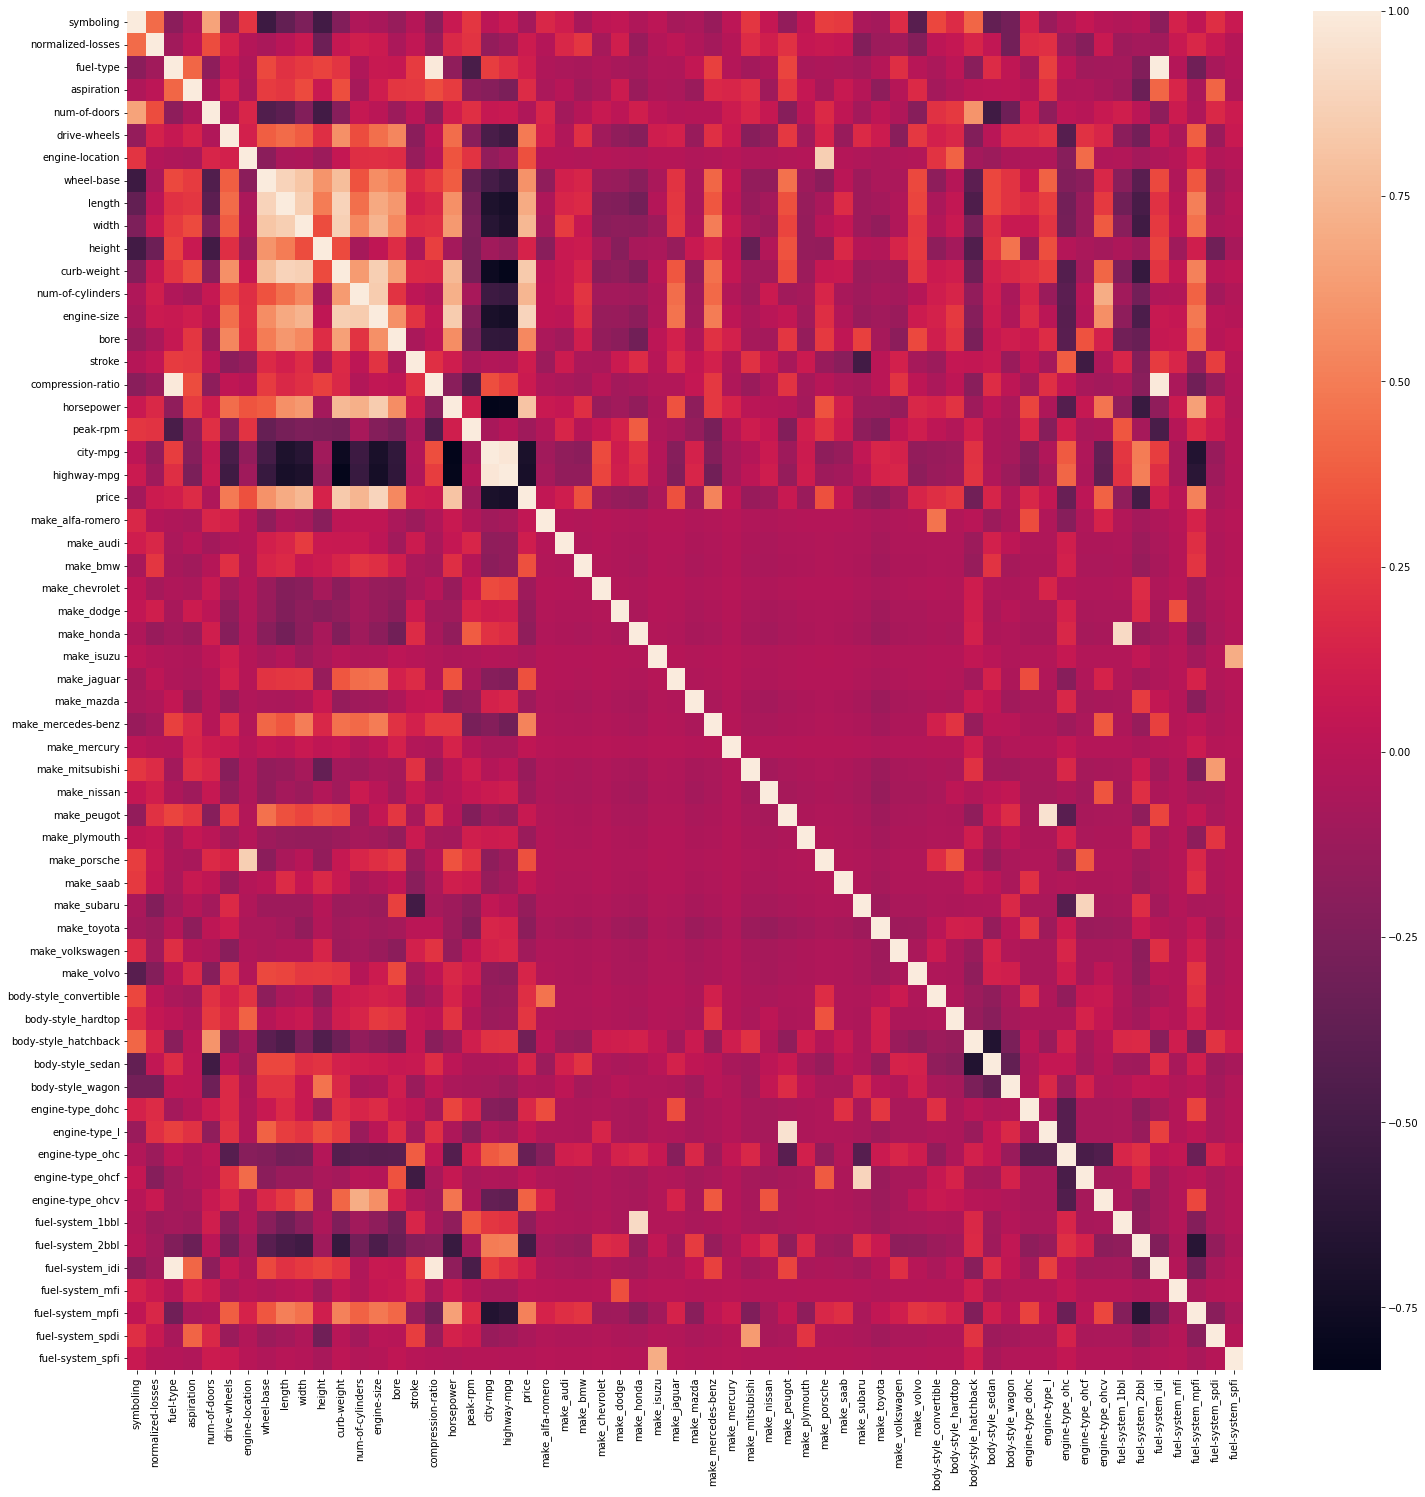

In [511]:
plt.figure(figsize=(25,25))
sns.heatmap(df.corr())

## 2.  No Multicolinearity

It shows the linearity between ondependent column

<AxesSubplot:>

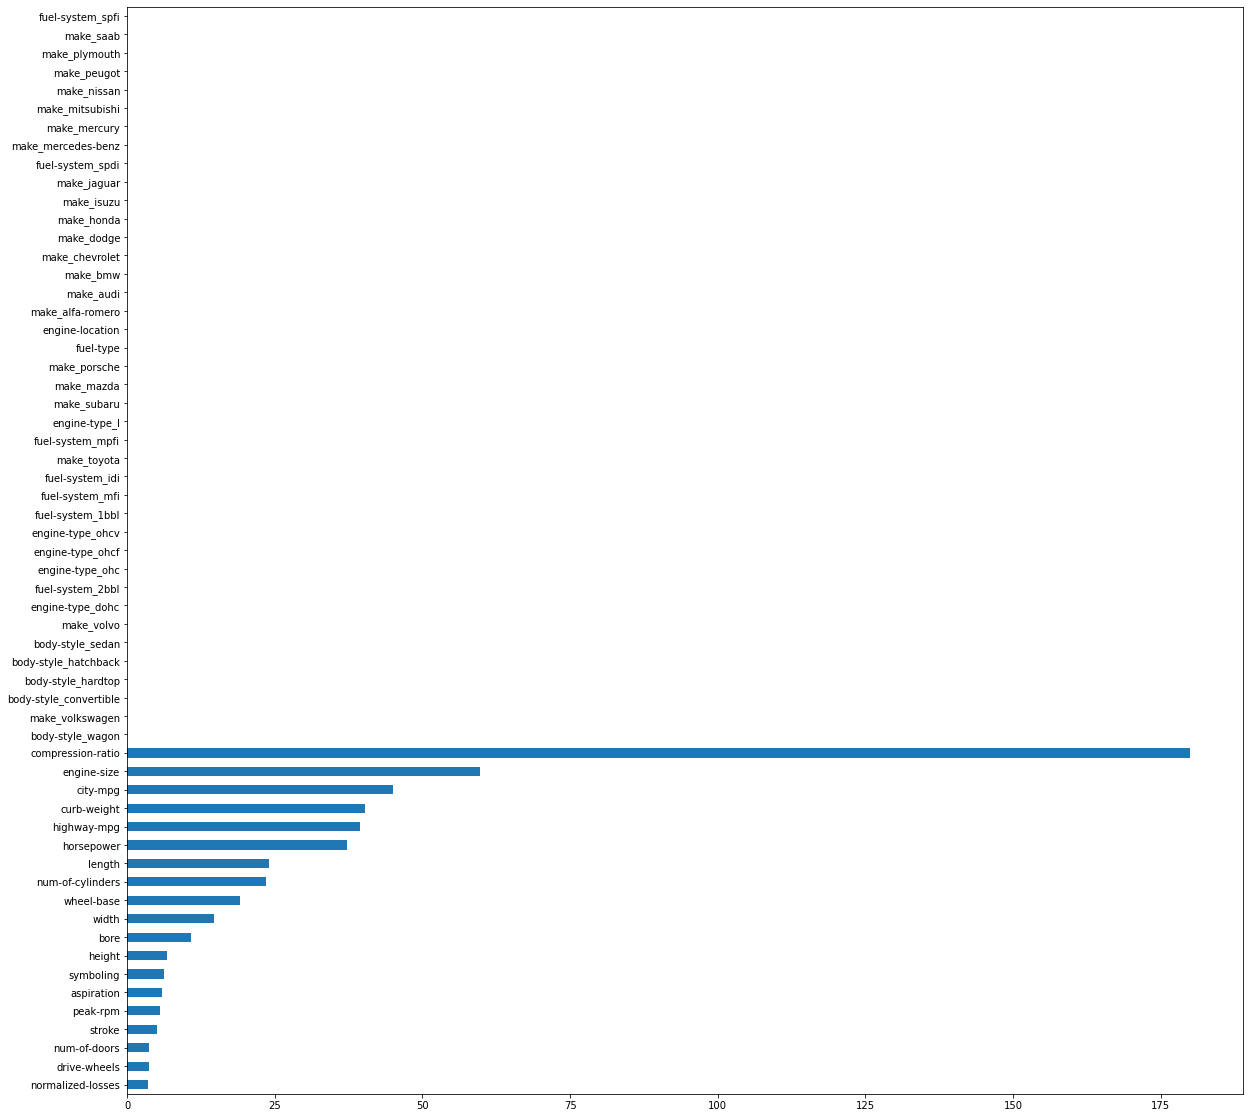

In [512]:

plt.figure(figsize=(20,20))
vif_list = []
for i in range(x.shape[1]):
    vif  = variance_inflation_factor(x.to_numpy(),i)
    vif_list.append(vif)
vif_list
s1 = pd.Series(vif_list,index=x.columns)
s1.sort_values().plot(kind="barh")

## 3.  Normality of Residual

In [513]:
residual = y_test  - y_pred
residual

164     -563.952371
188     1780.806235
146     -467.075889
126     3606.604243
151     1708.126388
92      -557.282703
153     1679.145728
177     -651.022063
116     -171.447843
31     -1248.999325
64       173.112154
115       62.715171
168    -1935.676372
158    -4220.258380
162     1258.073701
149       77.504469
191    -1431.426766
133      494.625320
11       100.473038
165     1024.128045
15     10334.860546
190    -1195.617954
172     -380.378742
124    -2290.018822
82      -478.856336
99      -596.568840
89       942.878935
90      2154.068307
125     1679.797516
150     -904.832290
189     2315.018273
59      5510.990899
41     -1140.367071
73       510.334342
32     -1289.809665
46    -11261.165346
157    -5421.251502
81      1773.994039
96     -3905.189032
Name: price, dtype: float64

#### 1. kde

<AxesSubplot:xlabel='price', ylabel='Density'>

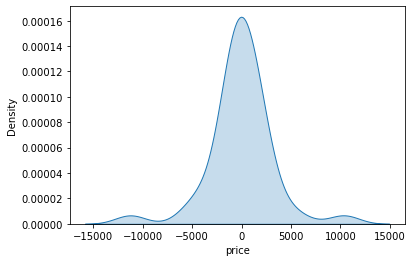

In [514]:
sns.kdeplot(residual,fill=True)

In [515]:
residual.skew()

-0.2514238490965552

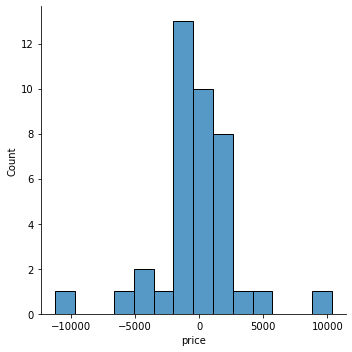

In [516]:
sns.displot(residual)

<AxesSubplot:xlabel='price', ylabel='Density'>

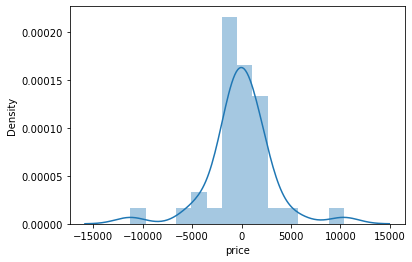

In [517]:
sns.distplot(residual)

### 2. Q-Q plot

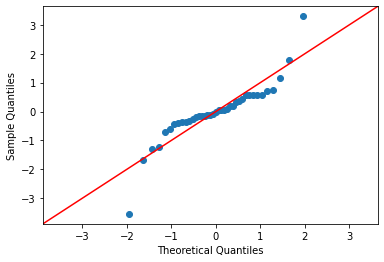

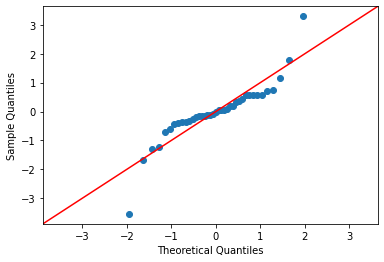

In [518]:
import statsmodels.api as sm
sm.qqplot(residual,line="45",fit=True)

### 3. Hypothesis test

#### 1. Shapiro test

In [519]:
from scipy.stats import shapiro
_,p_val = shapiro(residual)
print("p_val -->",p_val)
scientific_value = 0.05
if p_val > 0.05:
    print("Data is normally distributed")
else:
    print("data is not normally distributed")

p_val --> 0.00031660046079196036
data is not normally distributed


#### 2. ks test

In [520]:
from scipy.stats import kstest
_,p_val = kstest(residual,"norm")
print("p_val -->",p_val)
scientific_value = 0.05
if p_val > 0.05:
    print("Data is normally distributed")
else:
    print("data is not normally distributed")

p_val --> 4.796704259283898e-10
data is not normally distributed


#### 4. Normal test

In [521]:
from scipy.stats import normaltest
_,p_val = normaltest(residual)
print("p_val -->",p_val)
scientific_value = 0.05
if p_val > 0.05:
    print("Data is normally distributed")
else:
    print("data is not normally distributed")

p_val --> 0.0022267519174981884
data is not normally distributed


# By Using Adaboost Regressor We get Best Accuracy

In [525]:
ad = AdaBoostRegressor()
ad.fit(x_train,y_train)

AdaBoostRegressor()

In [526]:
# Testing Dataset
y_pred = ad.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
print("MSE :",mse)

rmse = np.sqrt(mse)
print("RMSE :",rmse)

mae = mean_absolute_error(y_test, y_pred)
print("MAE :",mae)

r2 = r2_score(y_test, y_pred)
print("R Squared :",r2)

MSE : 5694086.173693404
RMSE : 2386.2284412212935
MAE : 1734.9996642708995
R Squared : 0.9148838161248196


In [527]:
# training Data Set
y_pred_train = ad.predict(x_train)

mse = mean_squared_error(y_train, y_pred_train)
print("MSE :",mse)

rmse = np.sqrt(mse)
print("RMSE :",rmse)

mae = mean_absolute_error(y_train, y_pred_train)
print("MAE :",mae)

r2 = r2_score(y_train, y_pred_train)
print("R Squared :",r2)

MSE : 2366150.497284727
RMSE : 1538.2296633743374
MAE : 1312.4374613693037
R Squared : 0.9629960794594549


## Below we are predicting price on single row 

In [528]:
column_name =  x.columns
len(column_name)
x

,symboling,normalized-losses,fuel-type,aspiration,num-of-doors,drive-wheels,engine-location,wheel-base,length,width,...,engine-type_ohc,engine-type_ohcf,engine-type_ohcv,fuel-system_1bbl,fuel-system_2bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi
0,3,113.0,0,0,1,1,0,88.6,168.8,64.1,...,0,0,0,0,0,0,0,1,0,0
1,3,113.0,0,0,1,1,0,88.6,168.8,64.1,...,0,0,0,0,0,0,0,1,0,0
2,1,113.0,0,0,1,1,0,94.5,171.2,65.5,...,0,0,1,0,0,0,0,1,0,0
3,2,164.0,0,0,0,0,0,99.8,176.6,66.2,...,1,0,0,0,0,0,0,1,0,0
4,2,164.0,0,0,0,2,0,99.4,176.6,66.4,...,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,-1,95.0,0,0,0,1,0,109.1,188.8,68.9,...,1,0,0,0,0,0,0,1,0,0
191,-1,95.0,0,1,0,1,0,109.1,188.8,68.8,...,1,0,0,0,0,0,0,1,0,0
192,-1,95.0,0,0,0,1,0,109.1,188.8,68.9,...,0,0,1,0,0,0,0,1,0,0
193,-1,95.0,1,1,0,1,0,109.1,188.8,68.9,...,1,0,0,0,0,1,0,0,0,0


In [529]:
x.head(1).T.tail(60)

,0
symboling,3.00
normalized-losses,113.00
fuel-type,0.00
aspiration,0.00
num-of-doors,1.00
drive-wheels,1.00
engine-location,0.00
wheel-base,88.60
length,168.80
width,64.10


In [530]:
print(num_of_cylinder_dict)
print(num_of_doors_dict)
print(drive_wheel_dict)
print(engine_location_dict)
print(aspiration_dict)
print(fuel_type_dict)

{'four': 4, 'six': 6, 'five': 5, 'eight': 8, 'two': 2, 'three': 3, 'twelve': 12}
{'four': 0, 'two': 1}
{'fwd': 0, 'rwd': 1, '4wd': 2}
{'front': 0, 'rear': 1}
{'std': 0, 'turbo': 1}
{'gas': 0, 'diesel': 1}


In [531]:
symboling = 3.0
normalized_losses = 115.0
fuel_type = 'diesel'
aspiration= 'turbo'
num_of_doors= 'two'
drive_wheels= 'rwd'
engine_location= 'front'
wheel_base=88.60
length=168.80
width=64.10
height=48.80
curb_weight=2548.00
num_of_cylinders= 'six'
engine_size=130.00
bore=3.47
stroke=2.68
compression_ratio=9.00
horsepower=111.00
peak_rpm=5000.00
city_mpg=21.00
highway_mpg=27.00

# one hot encoded 
make = "alfa-romero"
body_style = "convertible"
engine_type = "dohc"
fuel_system = "1bbl"

In [532]:
## Define column name
make_col = "make_" + make
body_style_col = "body-style_" + body_style 
engine_type_col = "engine-type_" + engine_type
fuel_system_col = "fuel-system_" + fuel_system

print(make_col)
print(body_style_col)
print(engine_type_col)
print(fuel_system_col)

make_alfa-romero
body-style_convertible
engine-type_dohc
fuel-system_1bbl


In [533]:
column_name

Index(['symboling', 'normalized-losses', 'fuel-type', 'aspiration',
       'num-of-doors', 'drive-wheels', 'engine-location', 'wheel-base',
       'length', 'width', 'height', 'curb-weight', 'num-of-cylinders',
       'engine-size', 'bore', 'stroke', 'compression-ratio', 'horsepower',
       'peak-rpm', 'city-mpg', 'highway-mpg', 'make_alfa-romero', 'make_audi',
       'make_bmw', 'make_chevrolet', 'make_dodge', 'make_honda', 'make_isuzu',
       'make_jaguar', 'make_mazda', 'make_mercedes-benz', 'make_mercury',
       'make_mitsubishi', 'make_nissan', 'make_peugot', 'make_plymouth',
       'make_porsche', 'make_saab', 'make_subaru', 'make_toyota',
       'make_volkswagen', 'make_volvo', 'body-style_convertible',
       'body-style_hardtop', 'body-style_hatchback', 'body-style_sedan',
       'body-style_wagon', 'engine-type_dohc', 'engine-type_l',
       'engine-type_ohc', 'engine-type_ohcf', 'engine-type_ohcv',
       'fuel-system_1bbl', 'fuel-system_2bbl', 'fuel-system_idi',
       '

In [534]:
make_index = np.where (column_name == make_col)[0][0]
body_style_index = np.where(column_name == body_style_col)[0][0]
engine_type_index = np.where(column_name == engine_type_col)[0][0]
fuel_system_index = np.where(column_name == fuel_system_col)[0][0]

print(make_index)
print(body_style_index)
print(engine_type_index)
print(fuel_system_index)

21
42
47
52


In [535]:
array = np.zeros(len(column_name),dtype=int)
array

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [536]:
array[0] = symboling
array[1] = normalized_losses
array[2] = fuel_type_dict[fuel_type]
array[3] = aspiration_dict[aspiration]
array[4] = num_of_doors_dict[num_of_doors]
array[5] = drive_wheel_dict[drive_wheels]
array[6] = engine_location_dict[engine_location]
array[7] = wheel_base
array[8] = length
array[9] = width
array[10] = height
array[11] = curb_weight
array[12] = num_of_cylinder_dict[num_of_cylinders]
array[13] = engine_size
array[14] = bore
array[15] = stroke
array[16] = compression_ratio
array[17] = horsepower
array[18] = peak_rpm
array[19] = city_mpg
array[20] = highway_mpg


array[body_style_index] = 1
array[engine_type_index] = 1
array[fuel_system_index] = 1
array[make_index] = 1

array

array([   3,  115,    1,    1,    1,    1,    0,   88,  168,   64,   48,
       2548,    6,  130,    3,    2,    9,  111, 5000,   21,   27,    1,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    1,    0,
          0,    0,    0,    1,    0,    0,    0,    0,    1,    0,    0,
          0,    0,    0,    0])

In [538]:
predicted_price = ad.predict([array])[0]
print(f"Predicted price of car is {np.around(predicted_price,2)} -/ Rs Only")

Predicted price of car is 15029.9 -/ Rs Only


In [539]:
# store all this column is json 
label_encoded_dict  = {"num_of_cylinder_dict":num_of_cylinder_dict,"num_of_doors_dict":num_of_doors_dict,
                      "drive_wheel_dict":drive_wheel_dict,"engine_location_dict":engine_location_dict,
                      "aspiration_dict":aspiration_dict,"fuel_type_dict":fuel_type_dict,
                      "column_name":list(column_name)}
label_encoded_dict

{'num_of_cylinder_dict': {'four': 4,
  'six': 6,
  'five': 5,
  'eight': 8,
  'two': 2,
  'three': 3,
  'twelve': 12},
 'num_of_doors_dict': {'four': 0, 'two': 1},
 'drive_wheel_dict': {'fwd': 0, 'rwd': 1, '4wd': 2},
 'engine_location_dict': {'front': 0, 'rear': 1},
 'aspiration_dict': {'std': 0, 'turbo': 1},
 'fuel_type_dict': {'gas': 0, 'diesel': 1},
 'column_name': ['symboling',
  'normalized-losses',
  'fuel-type',
  'aspiration',
  'num-of-doors',
  'drive-wheels',
  'engine-location',
  'wheel-base',
  'length',
  'width',
  'height',
  'curb-weight',
  'num-of-cylinders',
  'engine-size',
  'bore',
  'stroke',
  'compression-ratio',
  'horsepower',
  'peak-rpm',
  'city-mpg',
  'highway-mpg',
  'make_alfa-romero',
  'make_audi',
  'make_bmw',
  'make_chevrolet',
  'make_dodge',
  'make_honda',
  'make_isuzu',
  'make_jaguar',
  'make_mazda',
  'make_mercedes-benz',
  'make_mercury',
  'make_mitsubishi',
  'make_nissan',
  'make_peugot',
  'make_plymouth',
  'make_porsche',
  'ma

In [540]:
import json

with open("label_encoded_dict.json", "w") as f:
    json.dump(label_encoded_dict, f)

In [542]:
# Save Model in Pickle File
import pickle

with open("Adaboost.pkl", "wb") as f:
    pickle.dump(ad, f)

In [ ]:
column_name